```
导入本次实验需要的软件包，用来完成对本次实验所需数据集的分析、处理、以及可视化操作。

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts
import matplotlib
import seaborn as sns
from pandas import Series,DataFrame
sns.set()

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
```

In [13]:
#请在此处输入代码
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts
import matplotlib
import seaborn as sns
from pandas import Series,DataFrame
sns.set()

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

```
获取中国平安、万科、国农科技的历史数据

#中国平安
zgpa=ts.get_hist_data('000001')
zgpa.index=pd.to_datetime(zgpa.index)
#万科
wanke=ts.get_hist_data('000002')
wanke.index=pd.to_datetime(wanke.index)
#国农科技
gnkj=ts.get_hist_data('000004')
gnkj.index=pd.to_datetime(gnkj.index)

```

In [14]:
#请在此处输入代码
#中国平安
zgpa=ts.get_hist_data('000001')
zgpa.index=pd.to_datetime(zgpa.index)
#万科
wanke=ts.get_hist_data('000002')
wanke.index=pd.to_datetime(wanke.index)
#国农科技
gnkj=ts.get_hist_data('000004')
gnkj.index=pd.to_datetime(gnkj.index)


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


```
closing_df=zgpa[['open','close']]
closing_df['zgpa_df']=zgpa['close']
closing_df['wanke_df']=wanke['close']
closing_df['gnkj_df']=gnkj['close']
del closing_df['open']
del closing_df['close']
tech_rets=closing_df.pct_change()
```

In [17]:
#请在此处输入代码
closing_df=zgpa[['open','close']]
closing_df['zgpa_df']=zgpa['close']
closing_df['wanke_df']=wanke['close']
closing_df['gnkj_df']=gnkj['close']
del closing_df['open']
del closing_df['close']
print(type(closing_df))
tech_rets=closing_df.pct_change()

<class 'pandas.core.frame.DataFrame'>


/home/work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/work/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

```
画出中国平安和万科的相关性图
可自行绘制别的相关性图

sns.jointplot('zgpa_df','wanke_df',tech_rets,kind='scatter')
```

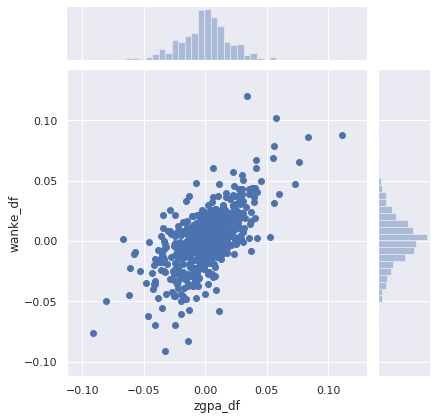

In [16]:
#请在此处输入代码
sns.jointplot('zgpa_df','wanke_df',tech_rets,kind='scatter')

```
绘制风险相关性图

rets=tech_rets.dropna()
area=np.pi*20
plt.scatter(rets.mean(),rets.std())
#分别设定xy的标注
plt.xlabel('expected return')
plt.ylabel('risk')
#画风险相关图
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50, 50), textcoords='offset points',
                 ha='right', va='bottom',arrowprops=dict(arrowstyle= '-' ,connectionstyle='arc3,rad=-0.3'))
```

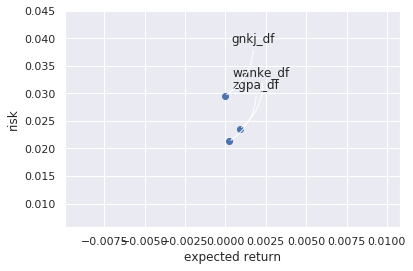

In [7]:
#请在此处输入代码
rets=tech_rets.dropna()
area=np.pi*20
plt.scatter(rets.mean(),rets.std())
#分别设定xy的标注
plt.xlabel('expected return')
plt.ylabel('risk')
#画风险相关图
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(50, 50), textcoords='offset points',
                 ha='right', va='bottom',arrowprops=dict(arrowstyle= '-' ,connectionstyle='arc3,rad=-0.3'))


```
绘制中国平安收盘价折线图

ma_day=[10,20,50]
for ma in ma_day:
    column_name='ma for %s days'%(str(ma))
    zgpa[column_name]=zgpa['close'].rolling(2).mean()

plt.title('中国平安收盘价')
plt.plot(zgpa['close'],label='收盘价')
```

/home/work/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/work/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

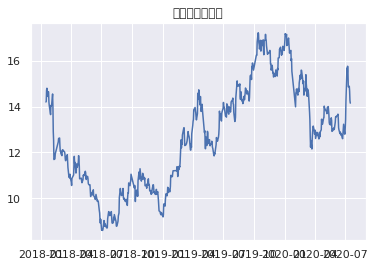

In [8]:
#请在此处输入代码
ma_day=[10,20,50]
for ma in ma_day:
    column_name='ma for %s days'%(str(ma))
    zgpa[column_name]=zgpa['close'].rolling(2).mean()

plt.title('中国平安收盘价')
plt.plot(zgpa['close'],label='收盘价')

```
绘制中国平安ma5折线图

plt.plot(zgpa['ma5'],label='ma5')
```

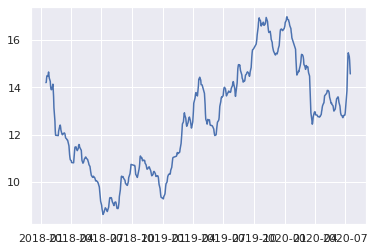

In [9]:
#请在此处输入代码
plt.plot(zgpa['ma5'],label='ma5')

```
绘制中国平安ma20折线图

plt.plot(zgpa['ma20'],label='ma20')
```

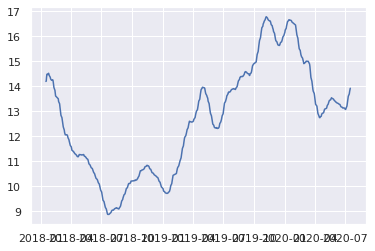

In [10]:
#请在此处输入代码
plt.plot(zgpa['ma20'],label='ma20')

```
绘制中国平安成交量折线图

plt.plot(zgpa['volume'],label='成交量')
```

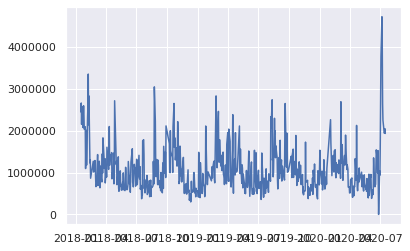

In [11]:
#请在此处输入代码
plt.plot(zgpa['volume'],label='成交量')

```
绘制关于日期和股价close，ma5，ma10，ma50合成总图

zgpa[['close','ma for 10 days','ma for 20 days','ma for 50 days']].plot(figsize=(10,4))
```


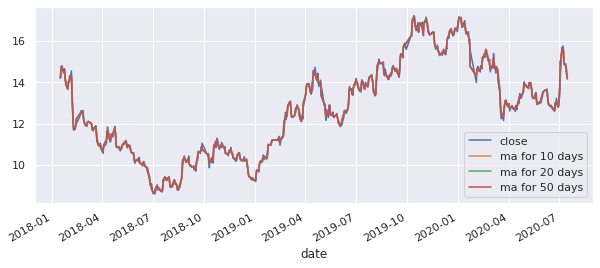

In [12]:
#请在此处输入代码
zgpa[['close','ma for 10 days','ma for 20 days','ma for 50 days']].plot(figsize=(10,4))